In [1]:
import sympy as sp

# Optional
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

# Constants
m1 = sp.symbols('m1') # Cart Mass
m2 = sp.symbols('m2') # Pendulum Mass
l = sp.symbols('l') # Pendulum Length
g = sp.symbols('g') # Gravity
t = sp.symbols('t') # Time
F = sp.symbols('F') # Cart Force

# State variables
x = sp.Function('x')(t) # Cart Position

# Alternate Way
#x = dynamicsymbols('x') # Cart Position

x_dot = sp.diff(x, t) # Cart Velocity
theta = sp.Function('theta')(t) # Pendulum Angle
theta_dot = sp.diff(theta, t) # Pendulum Angular Velocity
x_ddot = sp.diff(x_dot, t) # Cart Acceleration
theta_ddot = sp.diff(theta_dot, t) # Pendulum Angularb Acceleration


x_m = sp.Function('x_m')(t) # Pendulum Mass Position (X)
y_m = sp.Function('y_m')(t) # Pendulum Mass Position (Y)

x_m_dot = sp.diff('x_m_dot', t) # Pendulum Mass Velocity (X)
y_m_dot = sp.diff('y_m_dot', t) # Pendulum Mass Velocity (Y)

init_vprinting()

In [2]:
# Lagrangian

# Intermediate Variables
x_m = x + l * sp.sin(theta)
y_m = l * sp.cos(theta)

x_m_dot = sp.diff(x_m, t)
y_m_dot = sp.diff(y_m, t)


# Potential Energy ( Gravitational Potential of the Pendulum Mass )
U = m2 * g *  y_m

# Kinetic Energy
T_cart = sp.Rational(1, 2) * m1 * x_dot**2

T_pendulum = sp.Rational(1,2) * m2 * x_m_dot**2 + sp.Rational(1,2) * m2 * y_m_dot**2
T = T_cart + T_pendulum
display(x_m_dot)
display(T)
display(U)





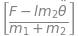

'HI!'

⎡         ẋ          ⎤
⎢                    ⎥
⎢         θ̇          ⎥
⎢                    ⎥
⎢     F - g⋅m₂⋅θ     ⎥
⎢     ──────────     ⎥
⎢         m₁         ⎥
⎢                    ⎥
⎢-F + g⋅m₁⋅θ + g⋅m₂⋅θ⎥
⎢────────────────────⎥
⎣        l⋅m₁        ⎦

⎡0       0       1  0⎤
⎢                    ⎥
⎢0       0       0  1⎥
⎢                    ⎥
⎢     -g⋅m₂          ⎥
⎢0    ──────     0  0⎥
⎢       m₁           ⎥
⎢                    ⎥
⎢   g⋅m₁ + g⋅m₂      ⎥
⎢0  ───────────  0  0⎥
⎣       l⋅m₁         ⎦

⎡0       0       1  0⎤
⎢                    ⎥
⎢0       0       0  1⎥
⎢                    ⎥
⎢     -g⋅m₂          ⎥
⎢0    ──────     0  0⎥
⎢       m₁           ⎥
⎢                    ⎥
⎢   g⋅m₁ + g⋅m₂      ⎥
⎢0  ───────────  0  0⎥
⎣       l⋅m₁         ⎦

⎡0    0     1.0   0 ⎤
⎢                   ⎥
⎢0    0      0   1.0⎥
⎢                   ⎥
⎢0  -1.962   0    0 ⎥
⎢                   ⎥
⎣0  2.943    0    0 ⎦

⎡         ẋ          ⎤
⎢                    ⎥
⎢         θ̇          ⎥
⎢                    ⎥
⎢     F - g⋅m₂⋅θ     ⎥
⎢     ──────────     ⎥
⎢         m₁         ⎥
⎢                    ⎥
⎢-F + g⋅m₁⋅θ + g⋅m₂⋅θ⎥
⎢────────────────────⎥
⎣        l⋅m₁        ⎦

⎡ 0  ⎤
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 1  ⎥
⎢ ── ⎥
⎢ m₁ ⎥
⎢    ⎥
⎢-1  ⎥
⎢────⎥
⎣l⋅m₁⎦

⎡  0  ⎤
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢ 0.2 ⎥
⎢     ⎥
⎣-0.05⎦

DONME


'x_ddot: '

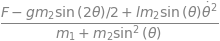

'theta_ddot: '

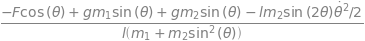

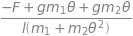

In [3]:
# Lagrangian
L = T - U

#display(L)
# TODO: TIDY THE BELOW LINEARIZATION UP AND MOVE TO NEW BLOCK

eom_x = sp.diff(sp.diff(L, x_dot), t) - sp.diff(L, x)
#display(eom_x)
# Linearize X
test_eom_x = eom_x.subs({sp.sin(theta): theta, sp.cos(theta): 1})
test_eom_x = test_eom_x.subs({sp.cos(theta): 1})
test_eom_x = test_eom_x.subs({theta_dot**2: 0})
display(test_eom_x)

display(sp.solve(test_eom_x- F, [x_ddot]))

# Linearize Theta
eom_theta = sp.trigsimp(sp.diff(sp.diff(L, theta_dot), t) - sp.diff(L, theta))

display(eom_theta)
test_eom_theta = eom_theta.subs({sp.sin(theta): theta, sp.cos(theta): 1, theta_dot**2: 0})
display(test_eom_theta)


eom_linear = [sp.simplify(test_eom_x - F), (test_eom_theta)]
display(eom_linear)
display("HI!")

accelerations_linear = sp.solve(eom_linear, [x_ddot, theta_ddot])
display(accelerations_linear)

x_1 = x
x_2 = theta
x_3 = x_dot
x_4 = theta_dot


x_dot_sys = sp.Matrix([x_3, x_4, accelerations_linear[x_ddot], accelerations_linear[theta_ddot]])

display(x_dot_sys)
df_dx = x_dot_sys.jacobian([x_1, x_2, x_3, x_4])
display(df_dx)

A = df_dx.subs([(x_1, 0), (x_2, 0), (x_3, 0), (x_4, 0)])
display(A)
A = A.evalf(subs={m1: 5, m2: 1, g: 9.81, l: 4.0})
display(A)

x_dot_sys = sp.Matrix([x_3, x_4, accelerations_linear[x_ddot], accelerations_linear[theta_ddot]])
display(x_dot_sys)
df_du = x_dot_sys.jacobian([(F)])
B = df_du.subs([(F, 0)])
display(B)
B = B.evalf(subs={m1: 5, m2: 1, g: 9.81, l: 4.0})
display(B)
print("DONME")


eom = [sp.simplify(eom_x - F), (eom_theta)]
display(eom)

accelerations = sp.solve(eom, [x_ddot, theta_ddot])
display("x_ddot: ", sp.simplify(accelerations[x_ddot]))
display("theta_ddot: ", sp.trigsimp(sp.simplify(accelerations[theta_ddot])))

theta_test = sp.trigsimp(sp.simplify(accelerations[theta_ddot]))

# Linearize, Small
test = theta_test.subs({sp.sin(theta): theta, sp.cos(theta): 1, theta_dot: 0})

display(test)

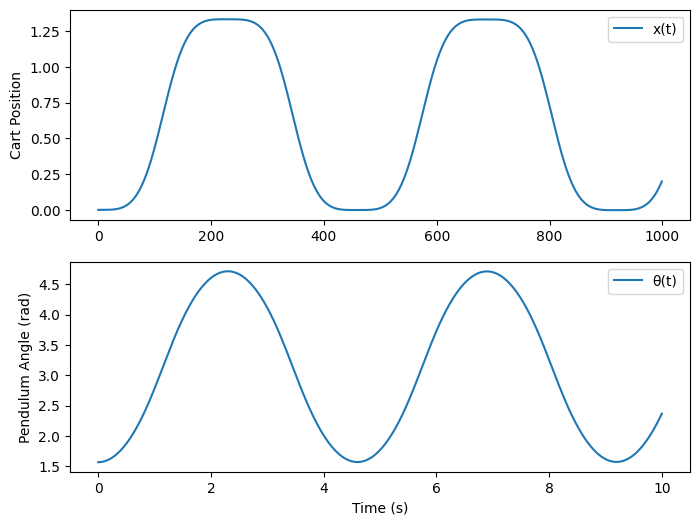

In [4]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

import numpy as np

F = 0
m1 = 5.0
m2 = 1.0
l = 4.0
g = 9.81

def system_dynamics(t, state):
    x, theta, x_dot, theta_dot = state
    x_ddot = (F - (g*m2*math.sin(2*theta))/2 + l * m2 * math.sin(theta)*theta_dot**2)/(m1+m2*math.sin(theta)**2)
    theta_ddot = (-F * math.cos(theta) + g * m1 * math.sin(theta) + g *m2*math.sin(theta)-((l*m2*math.sin(2*theta)*theta_dot**2)/2))/(l*(m1 + m2*math.sin(theta)**2))
    
    return [x_dot, theta_dot, x_ddot, theta_ddot]

#print(system_dynamics(0, [0,0,.1,0]))


# Initial conditions
x0 = 0.0
x_dot0 = 0.0
theta0 = math.pi/2.0  # Small angle deviation
theta_dot0 = 0.0
initial_state = [x0, theta0, x_dot0, theta_dot0]


t_span = (0,10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve

result = solve_ivp(system_dynamics, t_span, initial_state, t_eval=t_eval, method='RK23')



# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(result.y[0], label='x(t)')
ax[0].set_ylabel('Cart Position')
ax[0].legend()

ax[1].plot(result.t, result.y[1], label='θ(t)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Pendulum Angle (rad)')
ax[1].legend()

plt.show()


In [5]:
# This Checks
# Now For Numerical Linearizations
# Steps...
# Function to compute x_dot = f(x) [Done]
# Function compute finite difference of f(x) with perturbations etc 
# f(x_eq + h) - f(x_eq) / h where h is a small perturbation
# Function to extract A, B Linear Matrices, linearize()


import numpy as np
from scipy.signal import cont2discrete, lti, dlti, dstep


def linear(t, state):
    x, theta, x_dot, theta_dot = state
    x_ddot = (F - (g*m2*math.sin(2*theta))/2 + l * m2 * math.sin(theta)*theta_dot**2)/(m1+m2*math.sin(theta)**2)
    theta_ddot = (-F * math.cos(theta) + g * m1 * math.sin(theta) + g *m2*math.sin(theta)-((l*m2*math.sin(2*theta)*theta_dot**2)/2))/(l*(m1 + m2*math.sin(theta)**2))
    
    return [x_dot, theta_dot, x_ddot, theta_ddot]

def f(x, u):
    
    # Extract current state
    x_pos, theta, x_dot, theta_dot = x
    
    # Force Input
    F = u[0]
    
    x_ddot = (F - (g*m2*math.sin(2*theta))/2 + l * m2 * math.sin(theta)*theta_dot**2)/(m1+m2*math.sin(theta)**2)
    theta_ddot = (-F * math.cos(theta) + g * m1 * math.sin(theta) + g *m2*math.sin(theta)-((l*m2*math.sin(2*theta)*theta_dot**2)/2))/(l*(m1 + m2*math.sin(theta)**2))
    
    return np.array([x_dot, theta_dot, x_ddot, theta_ddot])

def fdm(f, x0, u0, h):
    f_x0 = f(x0, u)
    
def linearize(f, x0, u0, perturbation=1e-4):
    
    # Extract state and input size
    num_states = len(x0)
    num_inputs = len(u0)
    
    # System Matrix
    A = np.zeros((num_states, num_states))
    
    # Input Matrix
    B = np.zeros((num_states, num_inputs))
    
    # Initial Equilibrium Result
    f_x0 = f(x0, u0)
    
    # Linearize System Matrix
    for n in range(num_states):
        
        # Cache Eq point pre-perturb
        x_eval = x0.copy()
        
        
        # Add perturbation
        x_eval[n] += perturbation
        
        A[:, n] = (f(x_eval, u0) - f_x0) / perturbation
        
    
    for n in range(num_inputs):
        
        # Cache Eq point pre-perturb
        u_eval = u0.copy()
        
        
        # Add perturbation
        u_eval[n] += perturbation
        
        B[:, n] = (f(x0, u_eval) - f_x0) / perturbation
    
    
    return A, B
        
# Equilibirum points
x_eq = 0
x_dot_eq = 0
theta_eq = 0
theta_dot_eq = 0
x0 = [x_eq, theta_eq, x_dot_eq, theta_dot_eq]
u0 = [0]

A, B = linearize(f=f, x0=x0, u0 = u0)
print(A)
print(B)

C = np.ones((4, 4))
D = np.ones((4, 1))

# Define sampling interval T
T = 0.01

# Call cont2discrete function with bilinear transformation method
Ad,Bd,_,_,_ = cont2discrete((A,B,C,D),T,method='zoh')

# Print discrete-time matrices
print("Ad =",Ad)
print("Bd =",Bd)
#print("Cd =",Cd)
#print("Dd =",Dd)


#l_system = lti(A, B, C, D)
#t, x = l_system.step(T=np.linspace(0, 10, 5000))
#fig, ax = plt.subplots()
#ax.plot(t, x, label='Continuous', linewidth=3)

#dt = 0.1
#d_system = cont2discrete((A, B, C, D), dt, method='zoh')
#s, x_d = dstep(d_system)
#fig, ax = plt.subplots()
#ax.plot(t, x, label='Continuous', linewidth=3)





[[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.         -1.96199998  0.          0.        ]
 [ 0.          2.94299999  0.          0.        ]]
[[ 0.  ]
 [ 0.  ]
 [ 0.2 ]
 [-0.05]]
Ad = [[ 1.00000000e+00 -9.81024051e-05  1.00000000e-02 -3.27004809e-07]
 [ 0.00000000e+00  1.00014715e+00  0.00000000e+00  1.00004905e-02]
 [ 0.00000000e+00 -1.96209622e-02  1.00000000e+00 -9.81024051e-05]
 [ 0.00000000e+00  2.94314435e-02  0.00000000e+00  1.00014715e+00]]
Bd = [[ 1.00000409e-05]
 [-2.50006131e-06]
 [ 2.00001635e-03]
 [-5.00024525e-04]]


In [6]:
import control as ct
# LQR

Q = np.eye(4) * np.array([10,10,.1, .1])
print(Q)
R = np.eye(1) * 0.5

K, S, E = ct.lqr(A, B, Q, R)



K_str = np.array2string(K.flatten(), separator=', ')

print(K_str)



[[10.   0.   0.   0. ]
 [ 0.  10.   0.   0. ]
 [ 0.   0.   0.1  0. ]
 [ 0.   0.   0.   0.1]]
[  -4.47213595, -236.06515294,  -12.71876089, -144.3119975 ]


In [325]:
import sympy as sp

# Define symbols
m1, m2, g, l = sp.symbols('m1 m2 g l')

# Create a symbolic matrix A
A = sp.Matrix([
    [m1 * g * l, m2 * g * l / 2],
    [m1 + m2, l * (m1 - m2)]
])

# Print the original matrix
print("Original matrix A:")
display(A)

# Create a dictionary for the substitutions
subs_dict = {m1: 5, m2: 1, g: 9.81, l: 4.0}

# Substitute the numerical values in the matrix
A_substituted = A.subs(subs_dict)

# Print the matrix with substituted values
print("\nMatrix A with substituted values:")
print(A_substituted)

Original matrix A:


⎡           g⋅l⋅m₂   ⎤
⎢g⋅l⋅m₁     ──────   ⎥
⎢             2      ⎥
⎢                    ⎥
⎣m₁ + m₂  l⋅(m₁ - m₂)⎦


Matrix A with substituted values:
Matrix([[196.200000000000, 19.6200000000000], [6, 16.0000000000000]])
